## Import Librarys

In [ ]:
import numpy as np
import tensorflow as  tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [ ]:
data=pd.read_csv('/content/Churn_Modelling.csv')
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Dropping unimportant features

In [ ]:
data=data.drop(columns=['RowNumber','CustomerId','Surname'])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



## One Hot Encoding

In [ ]:
data['Gender']=data['Gender'].apply(lambda x :  0 if x=='Female' else 1)
data['Gender']=data['Gender'].astype(int)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Geography']=label_encoder.fit_transform(data['Geography'])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


## Data Analysis

0    7963
1    2037
Name: Exited, dtype: int64

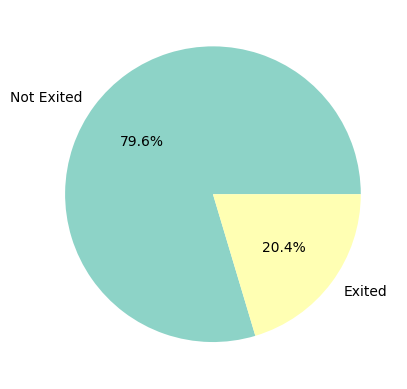

In [ ]:
value_counts=data['Exited'].value_counts()
plt.pie(value_counts, labels=['Not Exited', 'Exited'], autopct='%1.1f%%', colors=sns.color_palette('Set3'))


value_counts

In [ ]:
X=data.drop('Exited',axis=1)
y=data['Exited']

## Balance Data

In [ ]:
import numpy as np
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

print("Class distribution before oversampling:", Counter(y))

ros = RandomOverSampler(random_state=42)

X, y = ros.fit_resample(X, y)

print("Class distribution after oversampling:", Counter(y))


Class distribution before oversampling: Counter({0: 7963, 1: 2037})
Class distribution after oversampling: Counter({1: 7963, 0: 7963})


## Standardize Data

In [ ]:
X=np.array(X)
X=(X-X.mean())/X.std()

## Splitting data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=30)

## model evaluation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Random Forests
random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train, y_train)
random_forest_pred = random_forest_model.predict(x_test)

print("Random Forests:")
print("Accuracy:", accuracy_score(y_test, random_forest_pred))
print("Classification Report:\n", classification_report(y_test, random_forest_pred))


Random Forests:
Accuracy: 0.9516635279347144
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95      1593
           1       0.93      0.98      0.95      1593

    accuracy                           0.95      3186
   macro avg       0.95      0.95      0.95      3186
weighted avg       0.95      0.95      0.95      3186

